In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
# Hack because Mac sucks
def load_mnist (path: str) -> tuple[tuple[np.ndarray, np.ndarray], tuple[np.ndarray, np.ndarray]]:
    with np.load(path, allow_pickle=True) as f:
            x_train, y_train = f["x_train"], f["y_train"]
            x_test, y_test = f["x_test"], f["y_test"]

            return (x_train, y_train), (x_test, y_test)

In [6]:
(train_images, train_labels), (test_images, test_labels) = load_mnist(path="mnist.npz")
print('->loaded mnist images.')
train_images_df = pd.DataFrame([img.flatten() for img in train_images])
print('->train df created.')
test_images_df = pd.DataFrame([img.flatten() for img in test_images])
print('->test df created.')

->loaded mnist images.
->train df created.
->test df created.


In [8]:
train_images_df['label'] = train_labels
test_images_df['label'] = test_labels

In [9]:
X_train = train_images_df.drop('label', axis=1)
y_train = train_images_df['label']

X_test = test_images_df.drop('label', axis=1)
y_test = test_images_df['label']

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'knn accuracy score: {accuracy_score(y_test, y_pred)}')

knn accuracy score: 0.9705


In [12]:
model2 = GaussianNB()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(f'naive bayes accuracy: {accuracy_score(y_test, y_pred2)}')

naive bayes accuracy: 0.5544


In [13]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(f'xgboost accuracy: {accuracy_score(y_test, y_pred3)}')

xgboost accuracy: 0.9795


In [58]:
model4 = SVC()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(f'support vector classifier accuracy: {accuracy_score(y_test, y_pred4)}')

support vector classifier accuracy: 0.9791


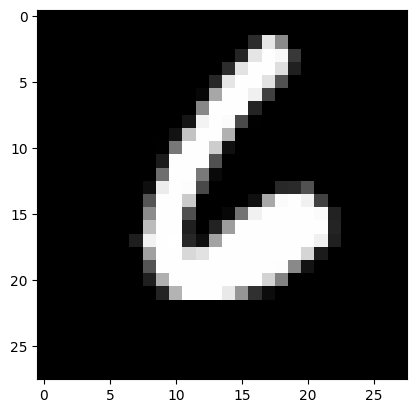

In [26]:
random_index = random.randint(0, len(test_images) - 1)
random_image = test_images[random_index]
plt.imshow(random_image, cmap='gray')
plt.show()

In [27]:
random_image_flattened = random_image.flatten().reshape(1, -1)
predicted_label = model3.predict(random_image_flattened)

print(f'The predicted digit is: {predicted_label[0]}')

The predicted digit is: 6
